In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product

# Task 1

The shallow NN is implemented as a simple script
Change the file name below this to train on a different dataset

In [ ]:
#dataset prep
file_name = r"datasets/blobs600.csv"
#file_name = r"datasets/circles500.csv"
df = pd.read_csv(file_name)

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1, 1)
print(X.shape, Y.shape)

(600, 3) (600, 1)


In [6]:
#helper functions

def sigmoid(t):
    return 1/(1 + np.exp(-t))

def loss_function(y, y_cap):
    epsilon = np.finfo(float).eps
    y_cap = np.clip(y_cap, epsilon, 1 - epsilon)
    return -(y * np.log(y_cap) + (1 - y) * np.log(1 - y_cap))


In [4]:
#hyperparameters
alpha = 0.01
w = np.array(X.shape[1] * [.5]).reshape(-1, 1)
b = 0.5
stopping = False; J_running = 0; J_prev = 0; iteration = 0; max_iters = 100000
#convergence threshold for running loss difference
threshold = 1e-6
#Checking convergence every N iterations
N = 1000
m = X.shape[0]
n = X.shape[1]

In [ ]:
#refactor and use functions for forward propagation ?

while not stopping:
    i = np.random.randint(0,m)
    x = X[i].reshape(-1,1)
    y = Y[i,0]

    #forward propagation
    z = (w.T @ x + b).item() #calculating the probabilty 
    y_hat = sigmoid(z) #activation function to get predicted class
    #calculating J_current from y, y_hat
    J_current = float(loss_function(y, y_hat))
    #gradient descent 
    dz = (y_hat - y)

    #looping over j elements of w to calculate partial derivative of the loss with respect to each wt
    delta_w = np.zeros_like(w)
    for j in range(n):
        delta_w[j,0] = x[j,0] * dz

    #calculating delta_b
    delta_b = dz
    #looping again over j elemets of w: w_j -= alpha * partial derivative
    for j in range(n) :
        w[j,0] = w[j, 0] - alpha* delta_w[j, 0]

    b -= alpha*delta_b
    #we need to check the stopping criteria 
    iteration +=1
    J_running += J_current

    if iteration > max_iters:
        #failing to converge
        stopping = True 

    if (iteration % N ) == 0:
        #comparing J_running with J_running_prev
        #if its less than threshold we will put stopping = true 
        if abs(J_running - J_prev) < threshold :
            stopping = True 

        J_prev = J_running
        J_running = 0
        #predictions and training accuracy
        Y_prob = sigmoid(X @ w + b)
        Y_pred = (Y_prob >= 0.5).astype(int)
        acc = np.mean(Y_pred == Y)
        print("Training accuracy:", float(acc))

Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.9966666666666667
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy: 0.995
Training accuracy:

# Task 2

The NN above is refactored as a scikit-learn style class.
Run fit() to train, and predict() to predict(), and score() to get an accuracy score on a given set 

In [ ]:
class LogisticRegressor:
    def __init__(self, alpha=0.01, max_iters=100000, threshold=1e-6, N=1000):
        self.alpha = alpha
        self.max_iters = max_iters
        self.threshold = threshold
        self.N = N
        self.trained = False #to be used in predict

    def sigmoid(self, t):
        return 1/(1 + np.exp(-t))
    
    def loss_function(self, y, y_cap):
        epsilon = np.finfo(float).eps
        y_cap = np.clip(y_cap, epsilon, 1 - epsilon)
        return -(y * np.log(y_cap) + (1 - y) * np.log(1 - y_cap))
    
    def fit(self, X, Y):

        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)

        m = X.shape[0]
        n = X.shape[1]

        w = np.array(X.shape[1] * [.5]).reshape(-1, 1)
        b = 0.5

        stopping = False; J_running = 0; J_prev = 0; iteration = 0; acc = 0
        

        while not stopping:
            i = np.random.randint(0,m)
            x = X[i].reshape(-1,1)
            y = Y[i,0]

            #forward propagation
            z = (w.T @ x + b).item()
            y_hat = self.sigmoid(z)
            #calculating J_current from y, y_hat
            J_current = float(self.loss_function(y, y_hat))
            #gradient descent 
            dz = (y_hat - y)

            #looping over j elements of w to calculate partial derivative of the loss with respect to each wt
            delta_w = np.zeros_like(w)
            for j in range(n):
                delta_w[j,0] = x[j,0] * dz

            #calculating delta_b
            delta_b = dz
            #looping again over j elemets of w: w_j -= alpha * partial derivative
            for j in range(n) :
                w[j,0] = w[j, 0] - self.alpha* delta_w[j, 0]

            b -= self.alpha*delta_b
            #we need to check the stopping criteria 
            iteration +=1
            J_running += J_current

            if iteration > self.max_iters:
                #failing to converge
                stopping = True 

            if (iteration % self.N ) == 0:
                #comparing J_running with J_running_prev
                #if its less than threshold we will put stopping = true 
                if abs(J_running - J_prev) < self.threshold :
                    stopping = True 

                J_prev = J_running
                J_running = 0
                #predictions and training accuracy
                Y_prob = self.sigmoid(X @ w + b)
                Y_pred = (Y_prob >= 0.5).astype(int)
                acc = np.mean(Y_pred == Y)
                print("Training accuracy:", float(acc))
        #set weights here
        self.w = w
        self.b = b
        self.accuracy = acc
        self.trained = True

    def predict(self,x):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")
        
        y_prob = self.sigmoid(x @ self.w + self.b)
        Y_pred = (y_prob >= 0.5).astype(int)
        return Y_pred
    
    def score(self, x_test, y_test):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")        
        
        y_pred = self.predict(x_test)
        correct = 0
        size = len(y_test)

        for i in range(size):
            if (y_pred[i]==y_test[i]):
                correct+=1

        return correct/size
    

## Dataset 1 - Blobs 3D

In [12]:
# Use pandas to read the CSV file as a dataframe
file_name = r"datasets/blobs600.csv"
df1 = pd.read_csv(file_name)

# The y values are those labelled 'Class': extract their values
y1 = df1['Class'].values
# The x values are all other columns
del df1['Class']   # drop the 'Class' column from the dataframe
X1 = df1.values     # convert the remaining columns to a numpy array
# Check its dimensions
print(f"The dimensions of the dataset are: {np.shape(X1)}")

The dimensions of the dataset are: (600, 3)


In [13]:
np.random.seed(42)
from sklearn.model_selection import train_test_split 
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1,y1,test_size = 0.30,random_state = 42, shuffle = True)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_temp,y1_temp,test_size = 0.50,random_state = 42)


#validation tests
for alpha in [0.01, 0.1, 0.5, 1, 2, 10]:
    lr = LogisticRegressor(alpha=alpha, max_iters=1000)
    lr.fit(X1_train, y1_train)
    print("validation accuracy , alpha =", alpha, ":", lr.score(X1_val, y1_val))

Training accuracy: 0.9976190476190476
validation accuracy , alpha = 0.01 : 0.9888888888888889
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 0.1 : 0.9888888888888889
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 0.5 : 0.9888888888888889
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 1 : 0.9888888888888889
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 2 : 0.9777777777777777
Training accuracy: 0.9976190476190476
validation accuracy , alpha = 10 : 0.9888888888888889


In [ ]:
#best alpha wourl be 1 but im using 5 to demonstrate the graph with a misclassificationm, otherwise it gives 100 percent test accuracy 
#and graph shows on missclassification points
lr1 = LogisticRegressor(alpha = 5, max_iters = 1000, threshold = 1e-6, N=1000)
lr1.fit(X1_train, y1_train)

Training accuracy: 0.9880952380952381


In [26]:
lr1.score(X1_test,y1_test)

0.9777777777777777

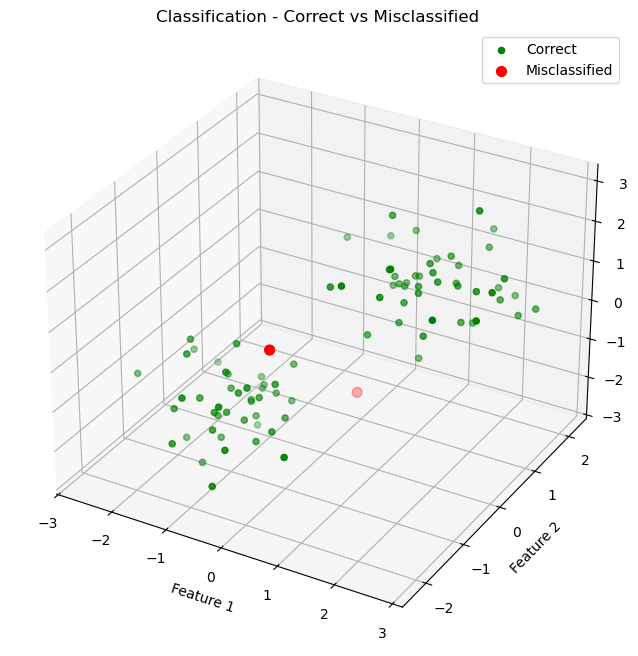

In [34]:
#plotting the misclassified points here
y_pred = lr1.predict(X1_test)
y_pred = y_pred.ravel()
correct = (y_pred == y1_test)
n_mis = int(np.sum(~correct))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

#correct preds
ax.scatter(
    X1_test[correct,0],
    X1_test[correct,1],
    X1_test[correct,2],
    c="green",
    label="Correct",
    s=20
)

#incorrect preds
if n_mis > 0:
    ax.scatter(
        X1_test[~correct,0],
        X1_test[~correct,1],
        X1_test[~correct,2],
        c="red",
        label="Misclassified",
        #depthshade=False,
        s=50
    )

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Classification - Correct vs Misclassified")
ax.legend()

plt.show()


The dataset was linearly seperable so training the model has a very high accuracy on this dataset. We increased alpha to 5 (even though we got the best scores when it was 1) to showcase some misclassifications.

## Dataset 2 - Circles 2d

In [ ]:
# Use pandas to read the CSV file as a dataframe
file_name = r"../datasets/circles500.csv"
df2 = pd.read_csv(file_name)

# The y values are those labelled 'Class': extract their values
y2 = df2['Class'].values

# The x values are all other columns
del df2['Class']   # drop the 'Class' column from the dataframe
X2 = df2.values     # convert the remaining columns to a numpy array
# Check its dimensions

print(f"The dimensions of Dataset 2 are: {np.shape(X2)}")

# Task 3

In [43]:
class LogisticRegressor:
    def __init__(self, alpha=0.01, max_iters=100000, threshold=1e-6, N=1000,hidden_layers=1, hidden_layer_size=3, seed=42):
        self.alpha = alpha
        self.max_iters = max_iters
        self.threshold = threshold
        self.N = N
        self.hidden_layers = hidden_layers
        self.hidden_layer_size = hidden_layer_size # not sure what to do with this. 
        self.seed = seed
        self.loss_history = []
        self.accuracy_history = []
        self.trained = False #to be used in predict
        


    def sigmoid(self, t):
        return 1/(1 + np.exp(-t))

    #def relu(self, z):
        #return np.maximum(0, z)

    #def relu_derivative(self, z):
        #return (z > 0).astype(float)
    
    def loss_function(self, y, y_cap):
        epsilon = np.finfo(float).eps
        y_cap = np.clip(y_cap, epsilon, 1 - epsilon)
        return -(y * np.log(y_cap) + (1 - y) * np.log(1 - y_cap))
    
    def fit(self, X, Y):
        np.random.seed(self.seed)
        self.loss_history = []
        self.accuracy_history = []

        
        m = X.shape[0] # samples
        n = X.shape[1] # features

        #init weights and bias
        W1 = np.random.randn(self.hidden_layer_size,n) * 0.01 #random values with mean=0, stdev=0.01 ?
        b1 = np.zeros((self.hidden_layer_size,1))

        W2 = np. random.randn(1,self.hidden_layer_size) * 0.01 
        b2 = np.zeros((1, 1))

        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)


        stopping = False; loss_prev = 0; iteration = 0; acc = 0
        

        while not stopping:
            #select random data point
            
            i = np.random.choice(np.arange(m))  # pick a random index
            x = X[i].reshape(-1,1)
            y = Y[i, 0]

            #forward pass
            a1 = self.sigmoid(W1 @ x + b1)
            y_cap = (self.sigmoid(W2 @ a1 + b2)).item()
            
            
            loss = self.loss_function(y, y_cap)
            self.loss_history.append(float(loss))
            
            #back propagation
            #output layer
            deltaz = y_cap - y
            delW2 = deltaz * a1.T
            delb2 = deltaz
            #hidden layer
            deltaz1 = (W2.T * deltaz) * (a1 * (1 - a1))
            delW1 = deltaz1 @ x.T    # gradient of hidden weights
            delb1 = deltaz1           # gradient of hidden biases

            #stochatic gradient descent
            W1 = W1 - self.alpha * delW1
            b1 = b1 - self.alpha * delb1
            W2 = W2 - self.alpha * delW2
            b2 = b2 - self.alpha * delb2

            #to store accuracy per iteration
            pred_i = 1 if y_cap >= 0.5 else 0
            self.accuracy_history.append(1.0 if pred_i == y else 0.0)

        
            loss_prev = loss
            iteration += 1
            if iteration >= self.max_iters:
                stopping = True

        #set weights here
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.trained = True

    def predict(self,x):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")
        
        #change here
        a1 = self.sigmoid(self.W1 @ x.T + self.b1)
        y_prob = self.sigmoid(self.W2 @ a1 + self.b2)

        Y_pred = (y_prob >= 0.5).astype(int)
        return Y_pred
    
    def score(self, x_test, y_test):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")        
        
        y_pred = self.predict(x_test)
        #running into shape issues so trying this 
        y_pred = y_pred.flatten()
        y_test = y_test.flatten()
        correct = 0
        size = len(y_test)

        for i in range(size):
            if (y_pred[i]==y_test[i]):
                correct+=1

        return correct/size
    

In [44]:
#file_name = r"../datasets/blobs600.csv"
file_name = r"datasets/circles500.csv"
df1 = pd.read_csv(file_name)
Y = df1['Class'].values
del df1['Class']  
X = df1.values     
X.shape

(500, 2)

In [45]:
def data_split(X, Y, seed=42):
    Y = np.array(Y).reshape(-1,1)

    X_train, X_temp, y_train, y_temp = train_test_split( X,Y,test_size=0.30, random_state=seed, shuffle=True)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,test_size=0.50, random_state=seed, shuffle=True)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [47]:
hidden_sizes = [2, 3, 5, 10, 20]
datasets = [("Dataset1_blobs600", r"datasets/blobs600.csv"),("Dataset2_circles500", r"datasets/circles500.csv")]
results = {}

for name, path in datasets:
    df = pd.read_csv(path)

    Y = df["Class"].values
    del df["Class"]
    X = df.values

    X_train, y_train, X_val, y_val, X_test, y_test = data_split(X, Y, seed=42)

    print(name)
    print("Shapes:", X_train.shape, X_val.shape, X_test.shape)
    results[name] = []

Dataset1_blobs600
Shapes: (420, 3) (90, 3) (90, 3)
Dataset2_circles500
Shapes: (350, 2) (75, 2) (75, 2)


In [48]:
alphas = [0.01, 0.1, 0.5, 1, 2, 10]
for alpha in alphas:
    for h in hidden_sizes :
        lr = LogisticRegressor(alpha=alpha,max_iters=100000,threshold=1e-6,N=1000,hidden_layer_size=h)
        lr.fit(X_train, y_train)

        train_acc = lr.score(X_train, y_train)
        val_acc = lr.score(X_val, y_val)
        test_acc = lr.score(X_test, y_test)

        results[name].append((h, train_acc, val_acc, test_acc))

        print("hidden_nodes=", h,"| train=", train_acc, "| val=", val_acc, "| test=", test_acc)


hidden_nodes= 2 | train= 0.5142857142857142 | val= 0.5066666666666667 | test= 0.4266666666666667
hidden_nodes= 3 | train= 0.5085714285714286 | val= 0.48 | test= 0.41333333333333333
hidden_nodes= 5 | train= 0.5057142857142857 | val= 0.41333333333333333 | test= 0.5066666666666667
hidden_nodes= 10 | train= 0.4857142857142857 | val= 0.49333333333333335 | test= 0.5733333333333334
hidden_nodes= 20 | train= 0.4857142857142857 | val= 0.49333333333333335 | test= 0.5733333333333334
hidden_nodes= 2 | train= 0.8057142857142857 | val= 0.6666666666666666 | test= 0.8
hidden_nodes= 3 | train= 0.9914285714285714 | val= 0.9733333333333334 | test= 0.96
hidden_nodes= 5 | train= 0.9942857142857143 | val= 0.9733333333333334 | test= 0.9733333333333334
hidden_nodes= 10 | train= 1.0 | val= 0.9866666666666667 | test= 1.0
hidden_nodes= 20 | train= 1.0 | val= 0.9866666666666667 | test= 1.0
hidden_nodes= 2 | train= 0.8114285714285714 | val= 0.68 | test= 0.8
hidden_nodes= 3 | train= 0.9657142857142857 | val= 0.8933

KeyboardInterrupt: 

# Task 4

In [50]:
data = np.load("datasets/emnist_letters_85800.npz")

x_data = data["x"]
y_data = data["y"]

In [51]:
# Extract just two classes from the dataset

# PUT YOUR OWN CLASS NUMBERS HERE: remember that A=1, z=26.
c1 = 8   # example
c2 = 11  # example

mask = (y_data == c1) | (y_data == c2)

x_binary = x_data[mask]
y_binary = y_data[mask]

# Now change labels to 0 and 1
y_binary = (y_binary == c2).astype(int)

In [52]:
#flattening images 
m = x_binary.shape[0]
X = x_binary.reshape(m,-1)
y = y_binary.reshape(-1,1)
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (6600, 784)
y shape: (6600, 1)


In [53]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, shuffle=True)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (4620, 784)
Validation: (990, 784)
Test: (990, 784)


In [56]:
#model defintion here
class LogisticRegressor:
    def __init__(self, alpha=0.01, max_iters=100000, threshold=1e-6, N=1000,hidden_layers=1, hidden_layer_size=3, seed=42):
        self.alpha = alpha
        self.max_iters = max_iters
        self.threshold = threshold
        self.N = N
        self.hidden_layers = hidden_layers
        self.hidden_layer_size = hidden_layer_size # not sure what to do with this. 
        self.seed = seed
        self.loss_history = []
        self.accuracy_history = []
        self.trained = False #to be used in predict
        


    def sigmoid(self, t):
        return 1/(1 + np.exp(-t))

    #def relu(self, z):
        #return np.maximum(0, z)

    #def relu_derivative(self, z):
        #return (z > 0).astype(float)
    
    def loss_function(self, y, y_cap):
        epsilon = np.finfo(float).eps
        y_cap = np.clip(y_cap, epsilon, 1 - epsilon)
        return -(y * np.log(y_cap) + (1 - y) * np.log(1 - y_cap))
    
    def fit(self, X, Y):
        np.random.seed(self.seed)
        self.loss_history = []
        self.accuracy_history = []

        
        m = X.shape[0] # samples
        n = X.shape[1] # features

        #init weights and bias
        W1 = np.random.randn(self.hidden_layer_size,n) * 0.01 #random values with mean=0, stdev=0.01 ?
        b1 = np.zeros((self.hidden_layer_size,1))

        W2 = np. random.randn(1,self.hidden_layer_size) * 0.01 
        b2 = np.zeros((1, 1))

        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)


        stopping = False; loss_prev = 0; iteration = 0; acc = 0
        

        while not stopping:
            #select random data point
            
            i = np.random.choice(np.arange(m))  # pick a random index
            x = X[i].reshape(-1,1)
            y = Y[i, 0]

            #forward pass
            a1 = self.sigmoid(W1 @ x + b1)
            y_cap = (self.sigmoid(W2 @ a1 + b2)).item()
            
            
            loss = self.loss_function(y, y_cap)
            self.loss_history.append(float(loss))
            
            #back propagation
            #output layer
            deltaz = y_cap - y
            delW2 = deltaz * a1.T
            delb2 = deltaz
            #hidden layer
            deltaz1 = (W2.T * deltaz) * (a1 * (1 - a1))
            delW1 = deltaz1 @ x.T    # gradient of hidden weights
            delb1 = deltaz1           # gradient of hidden biases

            #stochatic gradient descent
            W1 = W1 - self.alpha * delW1
            b1 = b1 - self.alpha * delb1
            W2 = W2 - self.alpha * delW2
            b2 = b2 - self.alpha * delb2

            #to store accuracy per iteration
            pred_i = 1 if y_cap >= 0.5 else 0
            self.accuracy_history.append(1.0 if pred_i == y else 0.0)

        
            loss_prev = loss
            iteration += 1
            if iteration >= self.max_iters:
                stopping = True

        #set weights here
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.trained = True

    def predict(self,x):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")
        
        #change here
        a1 = self.sigmoid(self.W1 @ x.T + self.b1)
        y_prob = self.sigmoid(self.W2 @ a1 + self.b2)

        Y_pred = (y_prob >= 0.5).astype(int)
        return Y_pred
    
    def score(self, x_test, y_test):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")        
        
        y_pred = self.predict(x_test)
        #running into shape issues so trying this 
        y_pred = y_pred.flatten()
        y_test = y_test.flatten()
        correct = 0
        size = len(y_test)

        for i in range(size):
            if (y_pred[i]==y_test[i]):
                correct+=1

        return correct/size
    

In [57]:
learning_rates = [ 0.01, 0.05, 0.1, 0.5, 1.0, 5.0]
hidden_sizes = [3, 5, 10, 20]
max_iters_list = [15000, 25000, 50000]

results = []
best_model = None
best_acc = -np.inf

for lr in learning_rates:
    for hidden in hidden_sizes:
        for iters in max_iters_list:
            
            model = LogisticRegressor(alpha=lr, max_iters=iters, hidden_layer_size=hidden, seed=42)
            
            model.fit(X_train, y_train)
            acc = model.score(X_val, y_val) 
            results.append({
                'alpha': lr,
                'hidden_size': hidden,
                'max_iters': iters,
                'val_acc': acc
            })

            if acc > best_acc:
                best_acc = acc
                best_model = model

            print("lr=", lr, "hidden=", hidden, "iters=", iters, "--> val_acc=", acc)


best_hyper = max(results, key=lambda x: x['val_acc'])
print("best hyperparameters:", best_hyper)

lr= 0.01 hidden= 3 iters= 15000 --> val_acc= 0.9111111111111111
lr= 0.01 hidden= 3 iters= 25000 --> val_acc= 0.9212121212121213
lr= 0.01 hidden= 3 iters= 50000 --> val_acc= 0.9151515151515152
lr= 0.01 hidden= 5 iters= 15000 --> val_acc= 0.9171717171717172
lr= 0.01 hidden= 5 iters= 25000 --> val_acc= 0.9313131313131313
lr= 0.01 hidden= 5 iters= 50000 --> val_acc= 0.9434343434343434
lr= 0.01 hidden= 10 iters= 15000 --> val_acc= 0.9111111111111111
lr= 0.01 hidden= 10 iters= 25000 --> val_acc= 0.9242424242424242
lr= 0.01 hidden= 10 iters= 50000 --> val_acc= 0.9454545454545454
lr= 0.01 hidden= 20 iters= 15000 --> val_acc= 0.9171717171717172
lr= 0.01 hidden= 20 iters= 25000 --> val_acc= 0.9191919191919192
lr= 0.01 hidden= 20 iters= 50000 --> val_acc= 0.9474747474747475
lr= 0.05 hidden= 3 iters= 15000 --> val_acc= 0.8888888888888888
lr= 0.05 hidden= 3 iters= 25000 --> val_acc= 0.9101010101010101
lr= 0.05 hidden= 3 iters= 50000 --> val_acc= 0.9252525252525252
lr= 0.05 hidden= 5 iters= 15000 --

In [66]:
print("Test accuracy of the best model", best_model.score(X_test, y_test))
print("\nBest hyperameters:", best_hyper )

Test accuracy of the best model 0.9707070707070707

Best hyperameters: {'alpha': 0.1, 'hidden_size': 20, 'max_iters': 50000, 'val_acc': 0.9676767676767677}


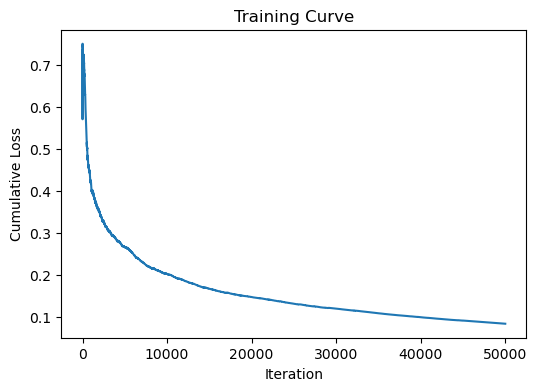

In [ ]:
loss_array = np.array(best_model.loss_history)
cumulative_avg = np.cumsum(loss_array) / np.arange(1, len(loss_array)+1)

plt.figure(figsize=(6,4))
plt.plot(cumulative_avg)
plt.xlabel("Iteration")
plt.ylabel("Cumulative Loss") #this is not prnting idk why
plt.title("Training Curve")
plt.show()


# Task 5

In [70]:
class LogisticRegressor:
    def __init__(self, alpha=0.01, max_iters=100000, threshold=1e-6, N=1000,hidden_layers=[5, 3, 2], seed=42,lam=0.001):
        self.alpha = alpha
        self.max_iters = max_iters
        self.threshold = threshold
        self.N = N
        self.hidden_layers = hidden_layers
        self.seed = seed
        self.loss_history = []
        self.accuracy_history = []
        self.lam = lam
        self.trained = False #to be used in predict
        


    def sigmoid(self, t):
        return 1/(1 + np.exp(-t))

    #def relu(self, z):
        #return np.maximum(0, z)

    #def relu_derivative(self, z):
        #return (z > 0).astype(float)
    
    def loss_function(self, y, y_cap):
        epsilon = np.finfo(float).eps
        y_cap = np.clip(y_cap, epsilon, 1 - epsilon)
        return -(y * np.log(y_cap) + (1 - y) * np.log(1 - y_cap))
    
    def fit(self, X, Y):
        np.random.seed(self.seed)
        self.loss_history = []
        self.accuracy_history = []

        m = X.shape[0] # samples
        n = X.shape[1] # features

        weights = []
        biases = []

        self.layers = [n] + self.hidden_layers + [1]

        for i in range(len(self.layers) - 1):
            w = np.random.randn(self.layers[i+1], self.layers[i]) * 0.01
            b = np.zeros((self.layers[i+1], 1))
            weights.append(w)
            biases.append(b)

        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)


        stopping = False; loss_prev = 0; iteration = 0; acc = 0
        

        while not stopping:
            #select random data point
            
            i = np.random.choice(np.arange(m))  # pick a random index
            x = X[i].reshape(-1,1)
            y = Y[i, 0]


            #activations
            a = x
            A = [a]

            #forward pass
            for i in range(len(weights)):
                a = self.sigmoid(weights[i] @ a + biases[i])
                A.append(a)

            y_cap = A[-1] # last activation is the output, hopefully 
            
            loss = self.loss_function(y, y_cap)
            l2_penalty = 0.0
            for w in weights:
                l2_penalty += np.sum(w**2)

            loss = loss + (self.lam / 2.0) * l2_penalty
            self.loss_history.append(float(loss.item()) )
            
            #-----back propagation-----
            deltaw = [np.zeros_like(w) for w in weights]
            deltab = [np.zeros_like(b) for b in biases]


            #output layer
            deltaz = y_cap - y
            deltab[-1] = deltaz
            deltaw[-1] = deltaz @ A[-2].T


            for i in reversed(range(len(weights)-1) ):
                deltaz = (weights[i+1].T @ deltaz) * (A[i+1] * (1 - A[i+1]))
                deltaw[i] = deltaz @ A[i].T
                deltab[i] = deltaz


            #update weights and biases
            for i in range(len(weights)):
                weights[i] -= self.alpha * (deltaw[i] + self.lam * weights[i])
                biases[i] -= self.alpha * deltab[i]

            #to store accuracy per iteration
            pred_i = 1 if y_cap >= 0.5 else 0
            self.accuracy_history.append(1.0 if pred_i == y else 0.0)

        
            loss_prev = loss
            iteration += 1
            if iteration >= self.max_iters:
                stopping = True

        #set weights here
        self.weights = weights
        self.biases = biases
        self.trained = True

    def predict(self,x):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")
        
        #change here
        a = x.T
        for w, b in zip(self.weights, self.biases):
            a = self.sigmoid(w @ a + b)
        Y_pred = (a >= 0.5).astype(int).flatten()
        return Y_pred
    
    def score(self, x_test, y_test):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")        
        
        y_pred = self.predict(x_test)
        #running into shape issues so trying this 
        y_pred = y_pred.flatten()
        y_test = y_test.flatten()
        correct = 0
        size = len(y_test)

        for i in range(size):
            if (y_pred[i]==y_test[i]):
                correct+=1

        return correct/size
    

Figuring out what combination of learning rate, number and size of hidden layers, and regularization parameter gives the best model. Takes some time to train.

In [74]:
#hyperparameter tunning
grid = {
    "alpha":      [0.01, 0.05, 0.1, 0.5, 1.0],
    "max_iters":  [15000, 25000, 50000, 100000],
    "hidden_layers": [[28, 10, 5],[20, 10],[30, 15, 5],[10],],
    "lam":        [0.0, 1e-4, 1e-3, 1e-2],   }

seed = 42

results = []
best = {"val_acc": -np.inf, "model": None, "params": None}
best_no_reg = {"val_acc": -np.inf, "model": None, "params": None}
best_l2     = {"val_acc": -np.inf, "model": None, "params": None}

for alpha, max_iters, hidden_layers, lam in product(grid["alpha"], grid["max_iters"], grid["hidden_layers"], grid["lam"]):
    model = LogisticRegressor(alpha=alpha,max_iters=max_iters,hidden_layers=hidden_layers,seed=seed,lam=lam,)
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    val_acc   = model.score(X_val, y_val)

    row = {"alpha": alpha,"max_iters": max_iters,"hidden_layers": hidden_layers,"lam": lam, "train_acc": train_acc, "val_acc": val_acc,}
    results.append(row)

    # keeping best by validation accuracy
    if val_acc > best["val_acc"]:
        best.update({"val_acc": val_acc, "model": model, "params": row})

    if lam == 0.0 and val_acc > best_no_reg["val_acc"]:
        best_no_reg.update({"val_acc": val_acc, "model": model, "params": row})

    if lam > 0.0 and val_acc > best_l2["val_acc"]:
        best_l2.update({"val_acc": val_acc, "model": model, "params": row})


    print(f"alpha={alpha:<5} iters={max_iters:<6} layers={hidden_layers} lam={lam:g} "
          f"-> train={train_acc:.4f} val={val_acc:.4f}")

print("\nBest hyperparameters (by val_acc):")
print(best["params"])


best_model = best["model"]
print("\nBest model performance:")
print("Train:", best_model.score(X_train, y_train))
print("Val:  ", best_model.score(X_val, y_val))
print("Test: ", best_model.score(X_test, y_test))


alpha=0.01  iters=15000  layers=[28, 10, 5] lam=0 -> train=0.4946 val=0.5242
alpha=0.01  iters=15000  layers=[28, 10, 5] lam=0.0001 -> train=0.4946 val=0.5242
alpha=0.01  iters=15000  layers=[28, 10, 5] lam=0.001 -> train=0.4946 val=0.5242
alpha=0.01  iters=15000  layers=[28, 10, 5] lam=0.01 -> train=0.4946 val=0.5242
alpha=0.01  iters=15000  layers=[20, 10] lam=0 -> train=0.4946 val=0.5242
alpha=0.01  iters=15000  layers=[20, 10] lam=0.0001 -> train=0.4946 val=0.5242
alpha=0.01  iters=15000  layers=[20, 10] lam=0.001 -> train=0.4946 val=0.5242
alpha=0.01  iters=15000  layers=[20, 10] lam=0.01 -> train=0.4946 val=0.5242
alpha=0.01  iters=15000  layers=[30, 15, 5] lam=0 -> train=0.5054 val=0.4758
alpha=0.01  iters=15000  layers=[30, 15, 5] lam=0.0001 -> train=0.5054 val=0.4758
alpha=0.01  iters=15000  layers=[30, 15, 5] lam=0.001 -> train=0.5054 val=0.4758
alpha=0.01  iters=15000  layers=[30, 15, 5] lam=0.01 -> train=0.5054 val=0.4758
alpha=0.01  iters=15000  layers=[10] lam=0 -> train=

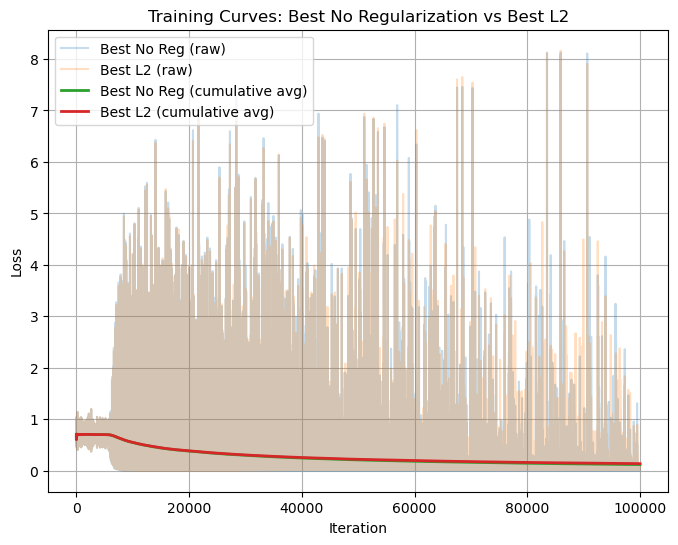

In [75]:
# Extract loss histories
loss_no = np.array(best_no_reg["model"].loss_history)
loss_l2 = np.array(best_l2["model"].loss_history)

# Compute cumulative averages
cum_no = np.cumsum(loss_no) / np.arange(1, len(loss_no)+1)
cum_l2 = np.cumsum(loss_l2) / np.arange(1, len(loss_l2)+1)

plt.figure(figsize=(8,6))

# Raw curves (lighter)
plt.plot(loss_no, alpha=0.25, label="Best No Reg (raw)")
plt.plot(loss_l2, alpha=0.25, label="Best L2 (raw)")

# Smoothed curves (clear trend)
plt.plot(cum_no, linewidth=2, label="Best No Reg (cumulative avg)")
plt.plot(cum_l2, linewidth=2, label="Best L2 (cumulative avg)")

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Curves: Best No Regularization vs Best L2")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
print("\nBest model:", "alpha =", best_model.alpha, "max_iters =", best_model.max_iters, "hidden_layers =", best_model.hidden_layers, "lam =", best_model.lam)